# PCA & FA (Principal Component Analysis & Factor Analysis)
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

# PCA (Principal Component Analysis)

In [8]:
# FA를 위해 모듈 설치
# https://pypi.org/project/factor-analyzer/

In [7]:
pip install factor-analyzer

  Using cached factor_analyzer-0.3.2.tar.gz (40 kB)
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=d9319ec02f319eea52fa4ce9051ae15596eeef22560006406628302c5eb4684c
  Stored in directory: c:\users\hwwoo\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

##### What is 'bfi'data? - 25 Personality items
- Description

25 personality self report items taken from the International Personality Item Pool (ipip.ori.org) were included as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project. The data from 2800 subjects are included here as a demonstration set for scale construction, factor analysis, and Item Response Theory analysis. Three additional demographic variables (sex, education, and age) are also included. This data set is deprecated and users are encouraged to use bfi.

- Source: https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html
- Data Source: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [10]:
data = pd.read_csv('bfi.csv', index_col =0)

data.drop(['gender', 'education', 'age'], axis=1, inplace=True)
data.dropna(inplace=True)
data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67547,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
67549,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,...,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2436 non-null   float64
 1   x2      2436 non-null   float64
 2   x3      2436 non-null   float64
 3   x4      2436 non-null   float64
 4   x5      2436 non-null   float64
 5   x6      2436 non-null   float64
 6   x7      2436 non-null   float64
 7   x8      2436 non-null   float64
 8   x9      2436 non-null   float64
 9   x10     2436 non-null   float64
 10  x11     2436 non-null   float64
 11  x12     2436 non-null   float64
 12  x13     2436 non-null   float64
 13  x14     2436 non-null   float64
 14  x15     2436 non-null   float64
 15  x16     2436 non-null   float64
 16  x17     2436 non-null   float64
 17  x18     2436 non-null   float64
 18  x19     2436 non-null   float64
 19  x20     2436 non-null   float64
 20  x21     2436 non-null   float64
 21  x22     2436 non-null   int64  


In [12]:
data.shape

(2436, 25)

In [13]:
data.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25'],
      dtype='object')

In [14]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)

In [15]:
data_scale.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
61617,-0.288867,-0.676006,-1.219235,-0.463061,-0.427781,-2.044561,-1.040527,-1.007084,1.053706,0.425250,...,0.035695,0.314659,-0.768056,-0.766184,0.017704,-1.609408,2.135352,-1.203293,-0.775668,0.401284
61618,-0.288867,-0.676006,0.306218,-1.809945,0.359284,0.384581,-0.282309,-0.232453,0.327177,0.425250,...,0.035695,-0.337689,-0.140840,1.145483,1.249869,-0.721610,-0.441031,-0.373389,-1.613967,0.401284
61620,1.843498,-0.676006,0.306218,-0.463061,-0.427781,-0.425133,0.475910,-0.232453,-0.399353,1.037850,...,0.670379,0.967008,0.486376,-0.766184,0.017704,-0.721610,-0.441031,0.456515,0.062632,-0.354147
61621,1.132710,-0.676006,1.068944,0.210382,0.359284,-0.425133,-0.282309,-1.007084,1.780236,1.037850,...,-0.598990,0.967008,-0.768056,0.508261,-1.214462,-1.609408,0.203065,-0.373389,-1.613967,1.912144
61622,-0.288867,-1.523972,-1.219235,-0.463061,0.359284,-0.425133,-0.282309,0.542178,0.327177,-0.799952,...,-0.598990,-0.337689,0.486376,0.508261,0.017704,-1.609408,0.203065,-0.373389,-1.613967,0.401284


In [16]:
data_scale.cov() # 공분산행렬

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
x1,1.000411,-0.351050,-0.273748,-0.156818,-0.192777,0.014704,0.012924,-0.020595,0.115121,0.038309,...,0.168348,0.139871,0.092404,0.042157,0.015187,0.005784,0.066203,-0.063814,-0.090549,0.099206
x2,-0.351050,1.000411,0.503248,0.351000,0.397563,0.103025,0.129627,0.188895,-0.146355,-0.121156,...,-0.093666,-0.050496,-0.040424,-0.086771,0.019696,0.125685,0.013964,0.165387,0.082643,-0.080871
x3,-0.273748,0.503248,1.000411,0.385076,0.515890,0.114258,0.146571,0.129444,-0.121165,-0.153875,...,-0.083300,-0.092511,-0.039174,-0.127160,-0.040159,0.150148,0.006590,0.226426,0.032280,-0.041768
x4,-0.156818,0.351000,0.385076,1.000411,0.325778,0.094851,0.226547,0.133119,-0.172342,-0.249778,...,-0.106689,-0.155352,-0.073918,-0.171298,-0.015142,0.057099,0.037779,0.071012,-0.049814,0.027319
x5,-0.192777,0.397563,0.515890,0.325778,1.000411,0.134747,0.116911,0.130873,-0.125582,-0.167105,...,-0.204849,-0.198918,-0.138529,-0.215434,-0.081438,0.162663,-0.006991,0.238289,0.011359,-0.050470
x6,0.014704,0.103025,0.114258,0.094851,0.134747,1.000411,0.438403,0.317400,-0.362640,-0.261187,...,-0.071984,-0.038196,-0.025487,-0.098075,-0.047989,0.179323,-0.129316,0.196643,0.100231,-0.130525
x7,0.012924,0.129627,0.146571,0.226547,0.116911,0.438403,1.000411,0.362975,-0.396252,-0.303944,...,-0.019959,-0.005588,0.003190,-0.044359,0.051233,0.161108,-0.057370,0.192760,0.047446,-0.066617
x8,-0.020595,0.188895,0.129444,0.133119,0.130873,0.317400,0.362975,1.000411,-0.357971,-0.351093,...,-0.079126,-0.066908,-0.077447,-0.122225,-0.023518,0.091179,-0.029616,0.058904,0.011365,-0.002810
x9,0.115121,-0.146355,-0.121165,-0.172342,-0.125582,-0.362640,-0.396252,-0.357971,1.000411,0.487751,...,0.215940,0.158411,0.201988,0.270744,0.197143,-0.093599,0.208158,-0.083061,0.053036,0.189621
x10,0.038309,-0.121156,-0.153875,-0.249778,-0.167105,-0.261187,-0.303944,-0.351093,0.487751,1.000411,...,0.216503,0.246400,0.241698,0.354810,0.179083,-0.085665,0.122646,-0.074159,0.135538,0.055827


In [17]:
data_scale.corr() #상관계수 행렬

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
x1,1.000000,-0.350905,-0.273636,-0.156754,-0.192698,0.014698,0.012918,-0.020587,0.115074,0.038293,...,0.168279,0.139814,0.092366,0.042140,0.015181,0.005782,0.066176,-0.063788,-0.090512,0.099166
x2,-0.350905,1.000000,0.503041,0.350856,0.397400,0.102983,0.129574,0.188818,-0.146295,-0.121106,...,-0.093627,-0.050476,-0.040407,-0.086735,0.019688,0.125633,0.013958,0.165319,0.082609,-0.080838
x3,-0.273636,0.503041,1.000000,0.384918,0.515679,0.114211,0.146511,0.129391,-0.121116,-0.153811,...,-0.083266,-0.092473,-0.039158,-0.127107,-0.040143,0.150086,0.006588,0.226333,0.032267,-0.041750
x4,-0.156754,0.350856,0.384918,1.000000,0.325644,0.094813,0.226454,0.133065,-0.172271,-0.249675,...,-0.106645,-0.155289,-0.073887,-0.171228,-0.015136,0.057075,0.037763,0.070983,-0.049793,0.027308
x5,-0.192698,0.397400,0.515679,0.325644,1.000000,0.134692,0.116863,0.130820,-0.125531,-0.167036,...,-0.204765,-0.198836,-0.138472,-0.215346,-0.081404,0.162596,-0.006988,0.238191,0.011354,-0.050449
x6,0.014698,0.102983,0.114211,0.094813,0.134692,1.000000,0.438223,0.317270,-0.362491,-0.261079,...,-0.071954,-0.038180,-0.025476,-0.098035,-0.047970,0.179249,-0.129263,0.196562,0.100189,-0.130471
x7,0.012918,0.129574,0.146511,0.226454,0.116863,0.438223,1.000000,0.362826,-0.396090,-0.303820,...,-0.019951,-0.005586,0.003189,-0.044341,0.051212,0.161042,-0.057347,0.192681,0.047427,-0.066590
x8,-0.020587,0.188818,0.129391,0.133065,0.130820,0.317270,0.362826,1.000000,-0.357824,-0.350949,...,-0.079093,-0.066880,-0.077416,-0.122175,-0.023508,0.091141,-0.029604,0.058880,0.011360,-0.002809
x9,0.115074,-0.146295,-0.121116,-0.172271,-0.125531,-0.362491,-0.396090,-0.357824,1.000000,0.487551,...,0.215852,0.158346,0.201905,0.270633,0.197062,-0.093561,0.208072,-0.083027,0.053014,0.189543
x10,0.038293,-0.121106,-0.153811,-0.249675,-0.167036,-0.261079,-0.303820,-0.350949,0.487551,1.000000,...,0.216414,0.246298,0.241599,0.354664,0.179009,-0.085630,0.122596,-0.074129,0.135482,0.055804


In [18]:
# PCA 진행
pca = PCA(random_state=20210323)
X_p = pca.fit_transform(data_scale)

In [19]:
# Eigen value
fa= FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None)
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

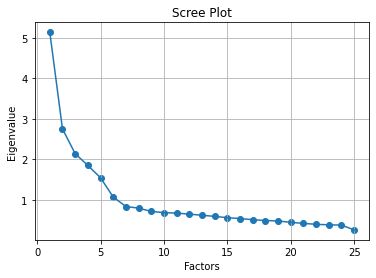

In [20]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [21]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
each_variance_ratio #각 PC별 분산 설명 비율

array([0.20537245, 0.11007547, 0.08570808, 0.0740931 , 0.06192651,
       0.0429433 , 0.03358156, 0.03196825, 0.02875957, 0.02752355,
       0.02705493, 0.02607199, 0.02493012, 0.02386251, 0.02252363,
       0.02173221, 0.0205807 , 0.01978013, 0.01930558, 0.01795684,
       0.01693464, 0.01602686, 0.01551218, 0.01527427, 0.01050156])

In [22]:
# 누적 분산 설명 비율
cumsum = np.cumsum(pca.explained_variance_ratio_)

pd.Series(np.cumsum(pca.explained_variance_ratio_)) #고유값을 기준으로 설명 가능한 분산 (누적)
# 위의 것을 np.cumsum(pca.explained_variance_ratio_) 으로 써도 실행됨.

0     0.205372
1     0.315448
2     0.401156
3     0.475249
4     0.537176
5     0.580119
6     0.613700
7     0.645669
8     0.674428
9     0.701952
10    0.729007
11    0.755079
12    0.780009
13    0.803871
14    0.826395
15    0.848127
16    0.868708
17    0.888488
18    0.907794
19    0.925750
20    0.942685
21    0.958712
22    0.974224
23    0.989498
24    1.000000
dtype: float64

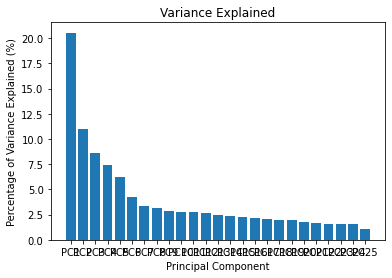

In [23]:
# 시각화 2
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [24]:
# PC 선택
# (몇개까지 선택할지는 분석가의 결정에 따름)
## 본 실습에서는 "ex1"을 따르도록 하겠음.

# ex1: Eigen value가 1 이상일 때 까지 (또는, 그래프기울기가 완만해지기 전까지)를 채택. (즉, 6개 선택)

# ex2: 약 85% 이상의 분산을 설명하는 PC16까지 선택 (즉, 17개 선택)
# d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
# d # 선택한 PC의 개수

In [25]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:6], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
             index=data.columns)

,PC1,PC2,PC3,PC4,PC5,PC6
x1,0.110202,-0.218902,-0.245872,-0.201804,-0.270364,-0.165829
x2,0.015719,-0.188571,-0.190528,-0.075120,-0.113973,-0.092649
x3,0.118324,-0.153905,-0.201259,-0.129908,-0.210261,0.357013
x4,0.029509,0.090576,0.067831,0.241235,0.016945,0.153227
x5,0.490281,-0.333324,-0.255208,-0.189163,-0.150969,0.032915
x6,-0.422041,0.162960,-0.043447,-0.046223,-0.187215,-0.125232
x7,0.194210,-0.159139,0.127331,0.502886,0.047269,-0.203797
x8,0.040235,0.242298,0.164480,0.119154,-0.091919,-0.330289
x9,0.195248,-0.031171,-0.004665,0.395280,-0.036071,0.208255
x10,0.207383,-0.086872,-0.119081,0.113891,-0.003064,-0.425534


<AxesSubplot:>

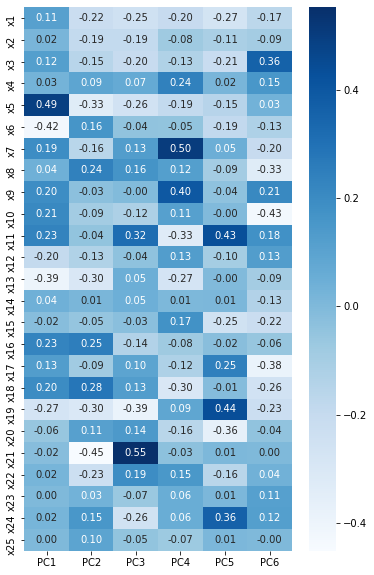

In [26]:
pca_result = pd.DataFrame(pca.components_[:,:6], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
             index=data.columns)
plt.figure(figsize=(6,10))
sns.heatmap(pca_result, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지

In [27]:
X_pp = pd.DataFrame(X_p[:,:6], 
                    columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
                    index = data.index)
X_pp #PCA 이후 만들어진 data (PC1~ PC6로 총 6개 변수로 축소)

,PC1,PC2,PC3,PC4,PC5,PC6
61617,2.370299,1.856536,-2.561254,0.500794,0.766565,0.552017
61618,0.372980,-0.147845,-1.126236,-0.307562,0.999889,0.623553
61620,0.831955,-0.659628,0.507829,-0.425028,1.566589,0.140086
61621,1.468606,1.063837,-2.140233,0.567288,0.684166,-1.389421
61622,0.350837,1.004977,-0.621911,0.726829,1.533974,0.672661
...,...,...,...,...,...,...
67547,4.066964,-1.053212,2.068989,-0.581108,0.216626,0.849262
67549,0.770074,-1.500500,0.446098,-2.009404,0.811757,-1.047096
67556,-1.568841,0.190316,1.643275,-0.783050,1.882051,0.596238
67559,1.539287,-0.941642,1.675189,-1.227477,3.000000,0.007268


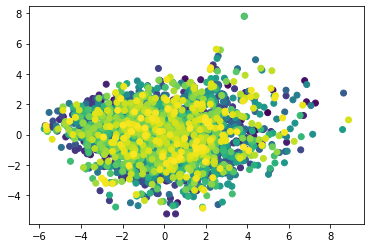

In [28]:
# Principal Component Pattern Plot 1
plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

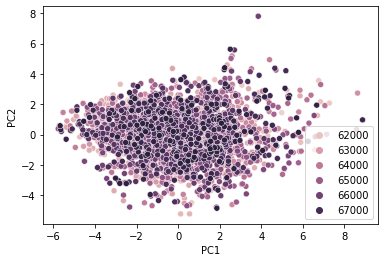

In [29]:
# Principal Component Pattern Plot 2
sns.scatterplot(data=X_pp, x='PC1',y='PC2',hue=X_pp.index)

# FA (Factor Analysis)

In [30]:
# Bartlett Test
## 요인분석 모형의 적합성 여부 검정 (요인분석모형으로 적합한지 유의확률로 파악)
## H0: 상관관계 행렬이 단위행렬이다 --> 귀무가설이 기각되어야 요인분석 모델 사용가능
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(18170.966350868883, 0.0)

In [31]:
# KMO Test (Kaiser-Meyer-Olkin Test)
## 변수들간 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값
## 이 값이 작으면 요인분석을 위한 변수들의 선정이 적절하지 못하다는 것을 의미
## 일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋음

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model =calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

0.8485397221949231

PCA과정과 동일하게 Eigen value가 1 이상일 때 까지 (또는, 그래프기울기가 완만해지기 전까지)를 채택.
따라서 본 예시에서는 6개의 factors 선택

In [32]:
# factor 6개로 선택
fa = FactorAnalyzer(n_factors=6, rotation = "varimax")
fa.fit(data_scale)
# FactorAnalyzer()에서 method="ml", rotation="promax" 설정도 가능 #ml: 최대우도방법
# 다른 옵션 추가 설명: https://github.com/EducationalTestingService/factor_analyzer

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [33]:
# FA: Factor Loadings
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
x1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
x2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
x3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
x4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
x5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
x6,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
x7,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
x8,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
x9,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
x10,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


<AxesSubplot:>

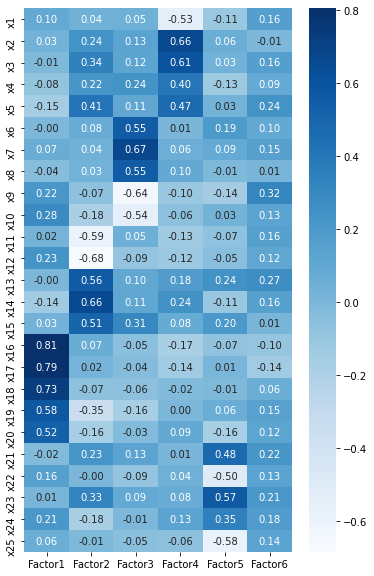

In [34]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지
# 아래 heat map을 보면, 요인5(6번째 요인)은 변수에 대해 높은 적재량을 가진 값(특징적인 값)이 없다.
# 따라서 5가지 요인을 최종 선택

In [35]:
# 최종 요인 5개 선택
fa = FactorAnalyzer(n_factors=5, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [36]:
fa_result_loading_final = pd.DataFrame(fa.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'],
                                       index=data_scale.columns)
fa_result_loading_final

,Factor1,Factor2,Factor3,Factor4,Factor5
x1,0.111126,0.040465,0.022798,-0.428166,-0.077931
x2,0.029588,0.213716,0.139037,0.626946,0.062139
x3,0.009357,0.317848,0.109331,0.650743,0.056196
x4,-0.066476,0.204566,0.230584,0.435624,-0.112700
x5,-0.122113,0.393034,0.087869,0.537087,0.066708
x6,0.010416,0.070184,0.545824,0.038878,0.209584
x7,0.089574,0.033270,0.648731,0.102782,0.115434
x8,-0.030855,0.023907,0.557036,0.111578,-0.005183
x9,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
x10,0.290318,-0.176395,-0.562467,-0.047525,0.036822


<AxesSubplot:>

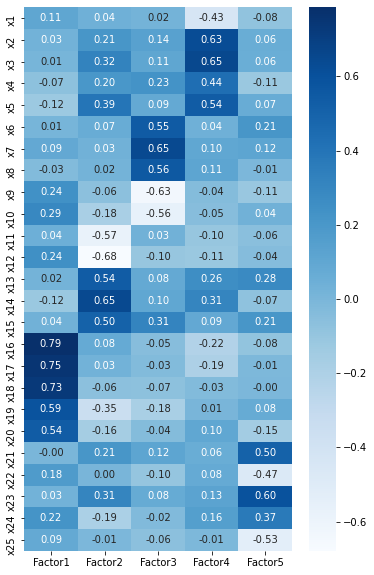

In [37]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_final, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지

In [38]:
fa.get_factor_variance()
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619


X1;
Indifferent to the feelings of others.

X2;
Inquire about others' well-being.

X3;
Know how to comfort others.

X4;
Love children.

X5;
Make people feel at ease.

X6;
Am exacting in my work.

X7;
Continue until everything is perfect.

X8;
Do things according to a plan.

X9;
Do things in a half-way manner.

X10;
Waste my time.

X11;
Don't talk a lot.

X12;
Find it difficult to approach others.

X13;
Know how to captivate people.

X14;
Make friends easily.

X15;
Take charge. 

X16;
Get angry easily.

X17;
Get irritated easily.

X18;
Have frequent mood swings.

X19;
Often feel blue.

X20;
Panic easily.

X21;
Full of ideas.

X22;
Avoid difficult reading material.

X23;
Carry the conversation to a higher level. 

X24;
Spend time reflecting on things.

X25;
Will not probe deeply into a subject.

- Factor1: Neuroticism 신경질적 성향
- Factor2: Extraversion 외향성
- Factor3: Conscientiousness 성실성
- Factor4: Agreeableness 우호성
- Factor5: Openess 개방성

In [39]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:5], 
                    columns = ['Neuroticism','Extraversion','Conscientiousness','Agreeableness','Openess'], 
                    index = data_scale.index)
X_ff

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
61617,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
61618,0.084369,0.559311,-0.601521,-0.189341,-0.248384
61620,0.520534,0.318235,0.025646,-0.751136,0.204503
61621,-0.197064,0.057696,-1.019263,0.064286,-1.029492
61622,-0.329835,0.408754,-0.058843,-0.820454,-0.691042
...,...,...,...,...,...
67547,1.308046,-1.152403,-0.104197,-1.146411,0.412042
67549,0.732472,0.252206,-0.587511,-0.317781,1.025564
67556,-0.223267,0.721169,0.787110,-1.058480,0.925103
67559,0.920521,0.749337,0.070953,-2.135145,0.673460


In [40]:
# clustering을 위해 data를 csv로 저장하는 법
# X_ff.to_csv("fa_data_bfi.csv", header=True, index=False)

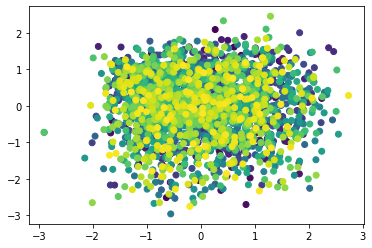

In [41]:
# Score Plot 1
plt.scatter(x=X_ff['Neuroticism'],y=X_ff['Extraversion'], c=X_ff.index)

<AxesSubplot:xlabel='Neuroticism', ylabel='Conscientiousness'>

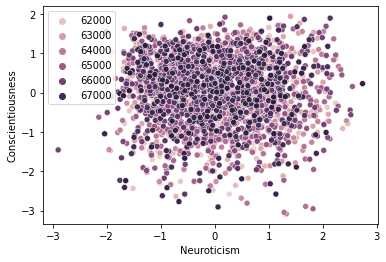

In [42]:
# Score Plot 2
sns.scatterplot(data=X_ff, x='Neuroticism',y='Conscientiousness',hue=X_ff.index)

# Appendix
### 탐색적 요인 분석 (EFA; Exploratory Factor Analysis)
- Factor를 사전에 정하지 않고, 데이터 탐색 (분석)을 통해 Factor 설정하는 것
- 위에서 했던 실습과 같은 경우는 EFA에 해당함

### 확인적 요인 분석 (CFA; Confirmatory Factor Analysis)
- Factor의 구성 요소 (variables)를 사전에 정하여, Factor를 미리 선정한 뒤, 이를 검증하는 것
- CFA의 경우, 신뢰도 계수 (Cronbach's alpha)를 사용

In [43]:
# 신뢰도계수 (Cronbach's alpha 계산) -cfa에서 사용
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems/(nitems-1))*(1-(itemvars.sum()/tscores.var(ddof=1)))

In [57]:
factors = ['Neuroticism','Extraversion','Conscientiousness','Agreeableness','Openess']
factors_items_dict={}

factors_items_dict[factors[0]] = ['x1','x2','x3','x4','x5']
factors_items_dict[factors[1]] = ['x6','x7','x8','x9','x10']
factors_items_dict[factors[2]] = ['x11','x12','x13','x14','x15']
factors_items_dict[factors[3]] = ['x16','x17','x18','x19','x20']
factors_items_dict[factors[4]] = ['x21','x22','x23','x24','x25']


factors_items_dict

{'Neuroticism': ['x1', 'x2', 'x3', 'x4', 'x5'],
 'Extraversion': ['x6', 'x7', 'x8', 'x9', 'x10'],
 'Conscientiousness': ['x11', 'x12', 'x13', 'x14', 'x15'],
 'Agreeableness': ['x16', 'x17', 'x18', 'x19', 'x20'],
 'Openess': ['x21', 'x22', 'x23', 'x24', 'x25']}

In [58]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(data_scale[value]))
    print()
    
# Cronbach's Alpha값이 0.7 이상이면 good/ acceptable, 0.9 이상이면 excellent

Neuroticism
0.4694418333378857

Extraversion
-0.25702842120732206

Conscientiousness
-0.5307444696404853

Agreeableness
0.8176885382852539

Openess
-0.13645758071218983



In [ ]:
# 만약 dataset (df)의 각 변수(column)명이 A1,A2, ..., A5, C1, C2, ... C5, E1, E2, ..., E5, N1, N2, ..., N5, O1, O2, ..., O5로 된 경우:
# 아래와 같은 코드 사용
factors = ['A', 'C', 'E', 'N', 'O']
factors_items_dict={}
for factor in factors:
    factors_items_dict[factor]=[x for x in df.columns if x[0]==factor]

factors_items_dict

# 아래와 같은 결과가 나올 것임.
{'A': ['A1', 'A2', 'A3', 'A4', 'A5'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5'],
 'O': ['O1', 'O2', 'O3', 'O4', 'O5']}

In [ ]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(df[value]))
    print()

# Cronbach's Alpha값이 0.7 이상이면 good/ acceptable, 0.9 이상이면 excellent

# 아래와 같은 결과가 나올 것임.
A
0.4437533019387808

C
-0.31628341382240494

E
-0.6552429584732491

N
0.8169468842774033

O
-0.176098107937655


참고링크:

- PCA

https://alex-blog.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D3-PCA

http://machinelearningkorea.com/2019/06/21/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9Dpca-%EC%9D%B4%ED%95%B4%EC%9A%A9-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%BD%94%EB%93%9C/

https://chancoding.tistory.com/53

https://bskyvision.com/867

https://blog.naver.com/tjdrud1323/221720259834

https://onlytojay.medium.com/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EA%B0%80%EC%9E%A5-%EC%A7%A7%EC%9D%80-pca-%EC%BD%94%EB%93%9C-667f13ff3e47

https://nittaku.tistory.com/291

- FA

https://ysyblog.tistory.com/124


https://pypi.org/project/factor-analyzer/

http://blog.naver.com/bosangmaster/221173325133

https://ichi.pro/ko/python-ui-yoin-bunseog-sogae-116625965253739

http://hleecaster.com/python-factor-analysis/

https://github.com/EducationalTestingService/factor_analyzer